# Improving Efficiency & Production Process of Electric Vehicles using Data Science Techniques

This challenge has been designed to provide with you hands-on understanding of data science problems in commercial EVs’ production and optimization in most advanced motor technologies used by companies like Tesla, BMW and Ford. 

It is often a challenging and complex task to measure rotor and stator temperatures in commercial electric vehicles. Even if these specific tasks can be completed successfully, these testing processes cannot be classified as economical for manufacturers. Keeping in mind that the temperature data have significant importance on dynamical responses of vehicles and motors’ performances, there is an emerging need for new proposals and scientific contributions in this domain.

Consider, one manufacturer of electric cars hired you to propose an estimator for the stator and rotor temperatures and design a predictive machine learning or deep learning model. Such a model could significantly help your new company to utilize new control strategies of the motors and maximize their operational performances. If you build an accurate ML/DL model, the needs of the company for implementing additional temperature sensors in vehicles will be reduced. The potential contribution will directly result in lowering car construction and maintenance costs, and will convince the company to invest further in hiring DS experts like you.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from scipy.stats import norm, skew,zscore #for some statistics

import xgboost

In [2]:
train_df=pd.read_csv("train_set.csv")
test_df=pd.read_csv("test_set.csv")
test_true=pd.read_csv("test_solutions.csv")

In [3]:
train_df.shape
#test_df.shape

(846368, 13)

In [4]:
#check for nan values
train_df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [5]:
train_df['profile_id'].value_counts()

20    43970
6     40387
65    40093
66    36475
27    35360
4     33423
58    33381
56    33122
53    32441
79    31153
44    26340
70    25676
30    23862
80    23823
74    23760
68    23330
36    22608
76    22187
48    21982
29    21357
81    17671
45    17141
63    16667
69    15349
72    15300
10    15255
77    14621
60    14542
57    14402
75    13471
67    11134
49    10815
50    10809
55    10806
54    10806
78     8444
43     8442
11     7886
59     7474
64     6249
46     2179
47     2175
Name: profile_id, dtype: int64

## Exploratory Data Analysis

### Minimum,Medium and Maximum motor_speed of each profile id

In [6]:
aggregations= {
    'motor_speed':[min,max,"mean"],
    'ambient':[min,max,"mean"],
    'coolant':[min,max,"mean"]
}
grouped_agg=train_df.groupby(['profile_id']).agg(aggregations) 
grouped_agg.columns = ["_".join(x) for x in grouped_agg.columns.ravel()]
grouped_agg

,motor_speed_min,motor_speed_max,motor_speed_mean,ambient_min,ambient_max,ambient_mean,coolant_min,coolant_max,coolant_mean
profile_id,,,,,,,,,
4,-1.222434,2.024164,0.229409,-1.658480,0.642002,-0.273821,-1.156575,-1.012797,-1.070574
6,-1.222586,1.483038,0.641857,-3.698899,2.712510,0.299181,-1.288667,1.110164,-0.604543
10,-1.239020,2.022567,-0.180202,-2.749857,-0.814454,-1.384847,-1.121212,-1.006354,-1.066007
11,-1.222436,1.990795,-0.077584,-1.638794,-0.620139,-1.012383,-1.121654,-1.033721,-1.074153
20,-1.222435,1.888867,0.288956,-2.748476,2.967117,0.003994,-1.206490,1.094156,-0.427462
27,-1.222437,1.942964,0.190105,-2.749854,1.512007,-0.571209,-1.127431,-1.028242,-1.064425
29,-1.222441,2.007902,0.333338,-3.067714,-0.009170,-1.568119,-1.135779,-0.993685,-1.052842
30,-1.222436,-0.161881,-0.791759,-3.077688,-1.011824,-2.078161,-1.161648,-1.038190,-1.072176
36,-1.222432,-0.248458,-0.777123,-3.512863,-1.628599,-2.746647,-1.109705,-0.922242,-1.058847


### Boxplot of Motor Speed over all Profile ID

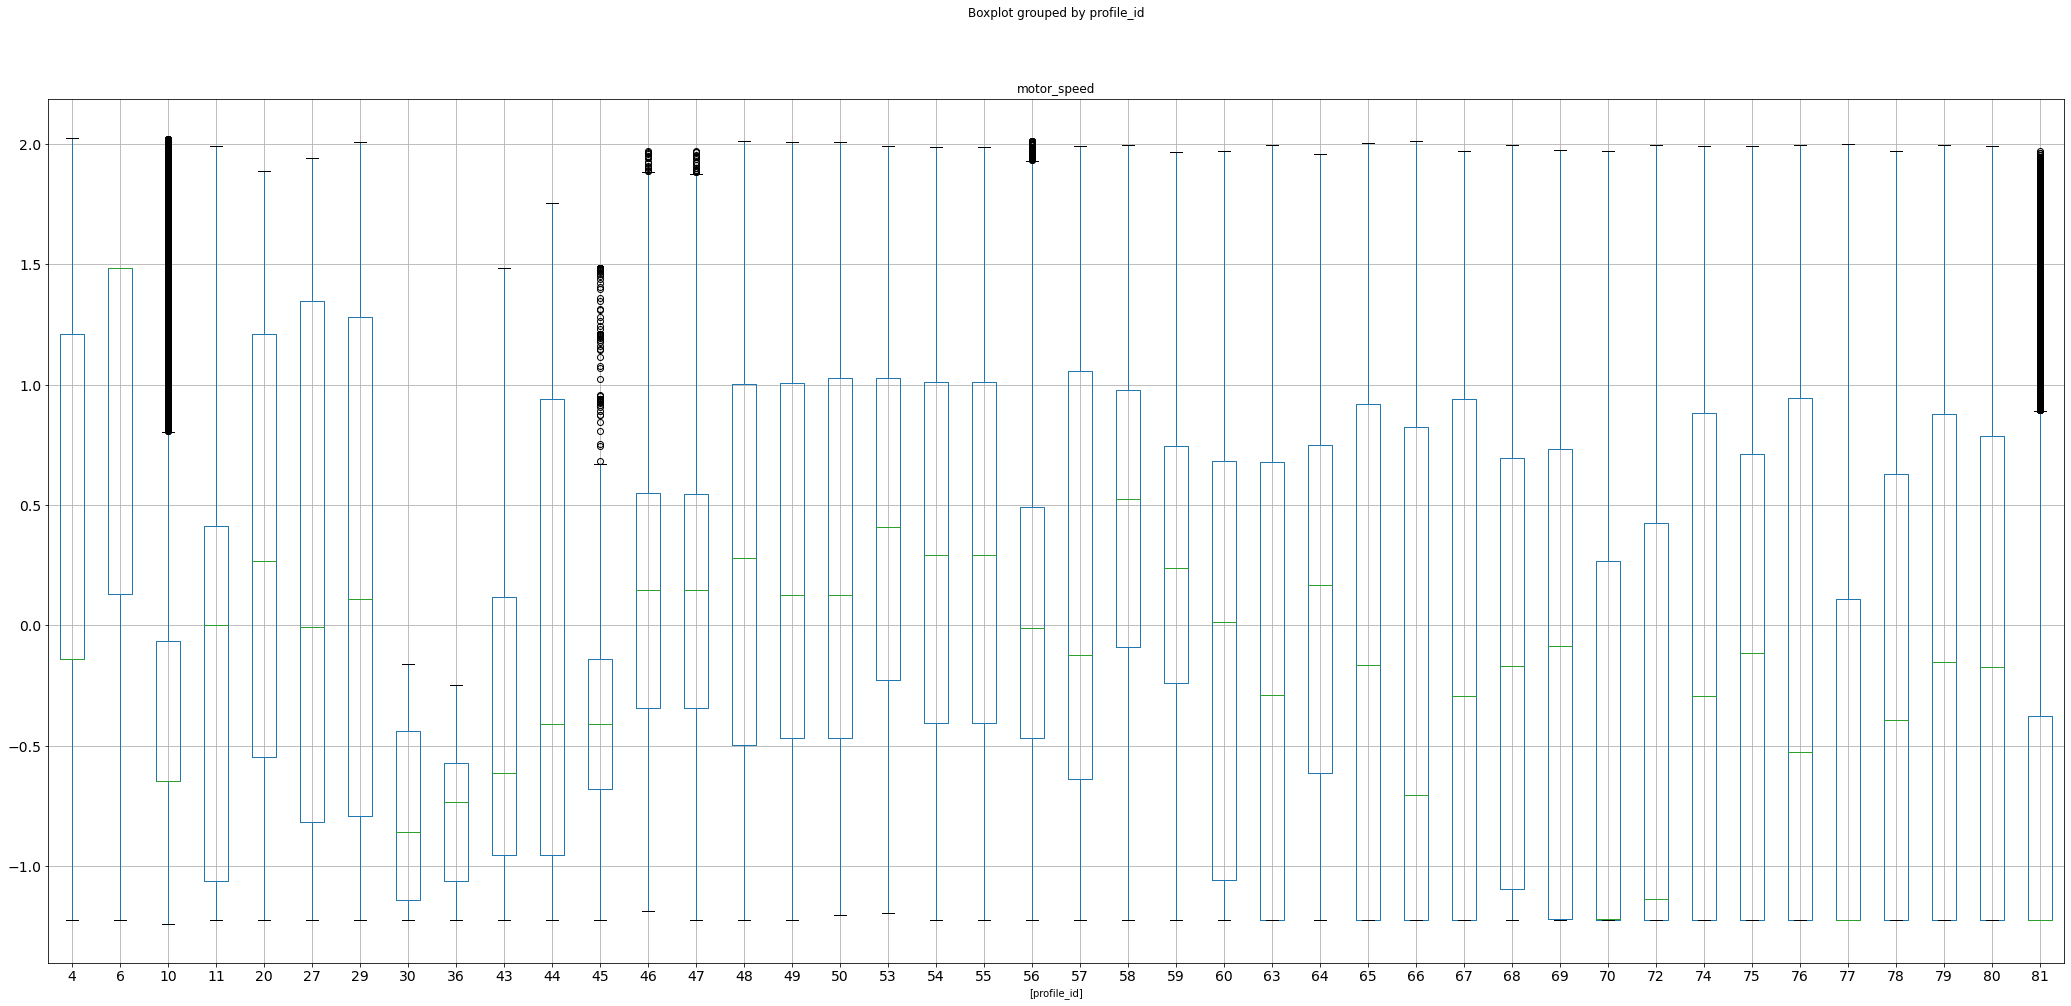

In [7]:
#motor_speed
#grouped=train_df[['motor_speed','profile_id']].groupby(['profile_id'])
#grouped.boxplot(rot=45,fontsize=12, figsize=(8,10))
#plt.pyplot.figure(figsize=(50,30))
train_df.boxplot(column=['motor_speed'],by=['profile_id'],fontsize=14,figsize=(35,16))
plt.pyplot.show()
#sns.boxplot(train_df[['motor_speed']])

### Boxplot of Ambient over all Profile ID

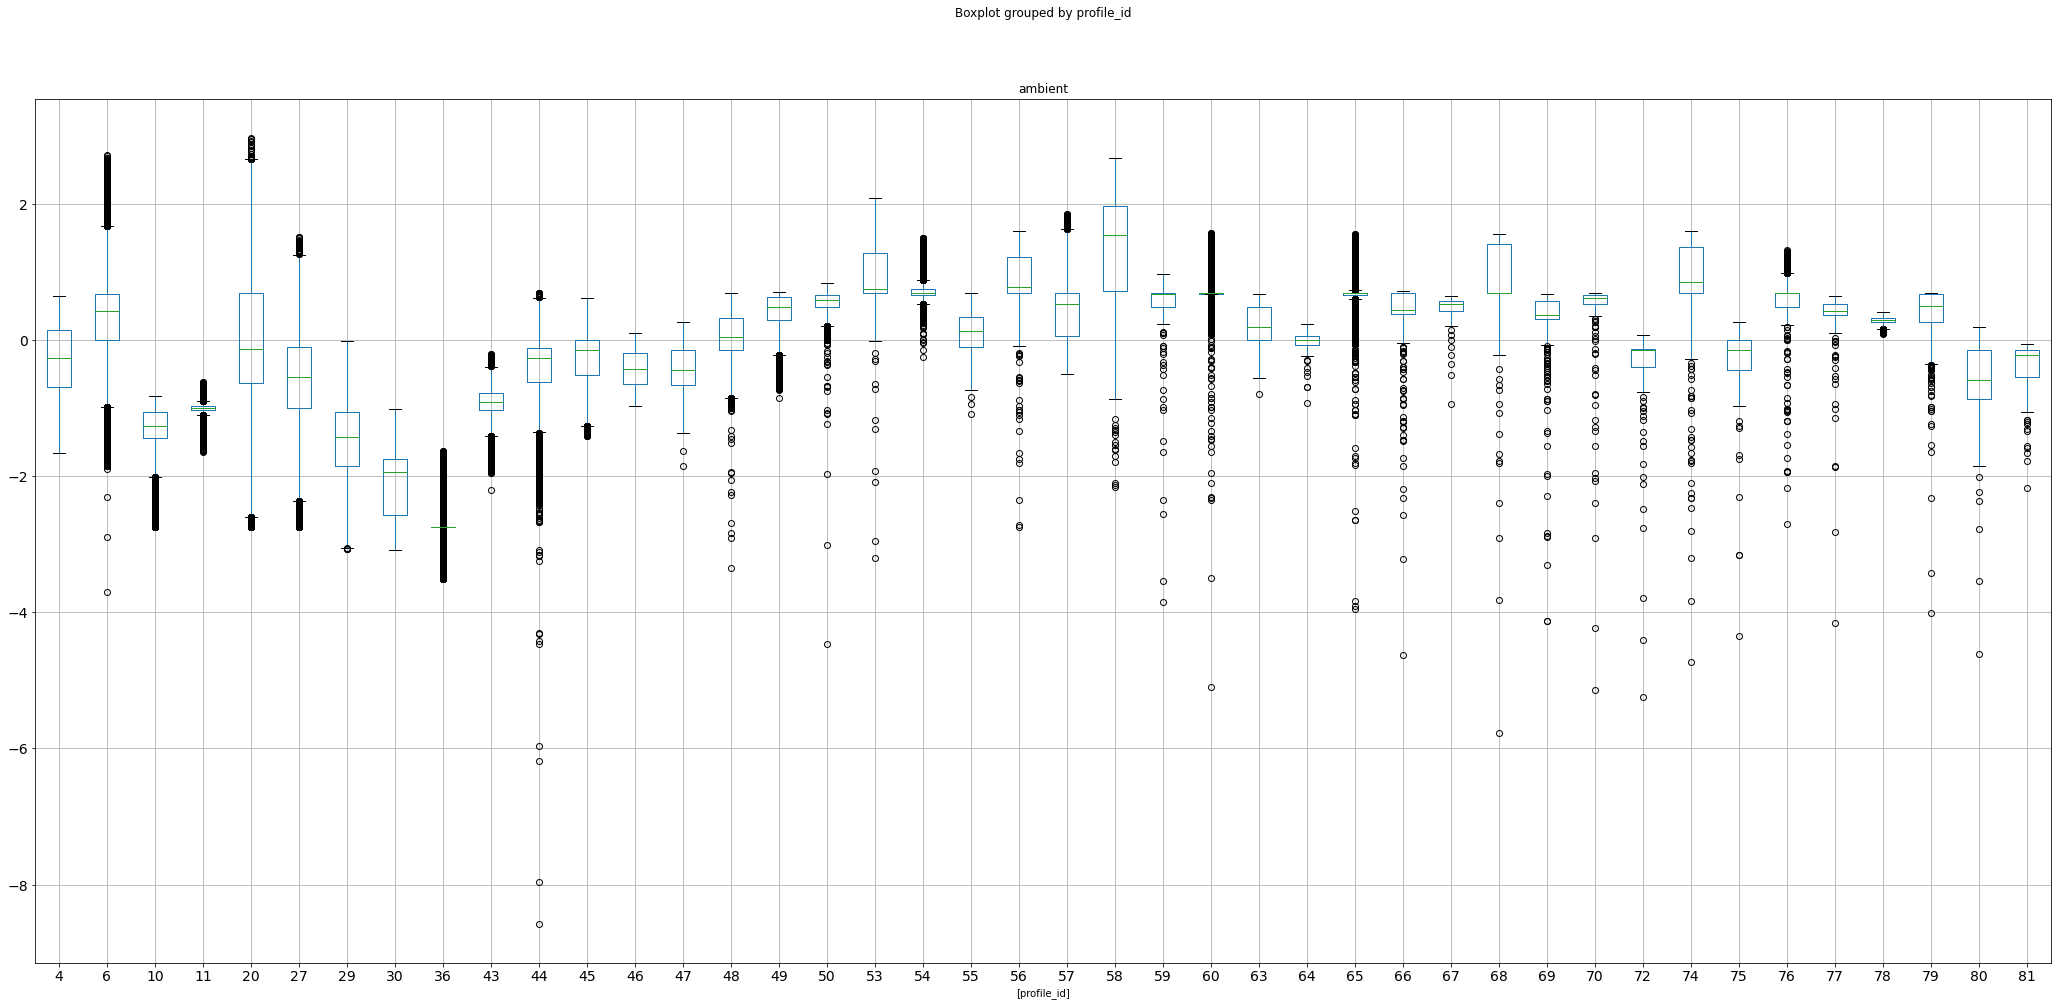

In [8]:
train_df.boxplot(column=['ambient'],by=['profile_id'],fontsize=14,figsize=(35,16))
plt.pyplot.show()

### Boxplot of Ambient - Training Dataset

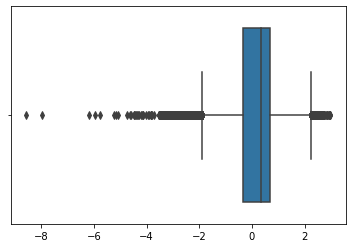

In [9]:
sns.boxplot(train_df[['ambient']])

### Boxplot of Ambient - Test Dataset

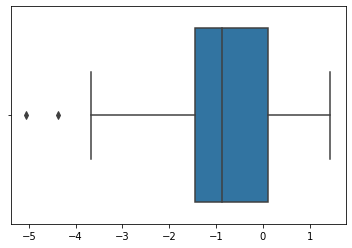

In [10]:
sns.boxplot(test_df[['ambient']])

### Remove outliers based on Ambient

In [11]:
Q1 = np.percentile(train_df[['ambient']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(train_df[['ambient']], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
max= Q3+ (1.5* IQR)
min = Q1-(1.5* IQR)
print(min)
print(max) 

-1.8957146974999999
2.2386261625


In [12]:
Q1 = np.percentile(test_df[['ambient']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(test_df[['ambient']], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
max = Q3+ (1.5* IQR)
min = Q1-(1.5* IQR)
u_limit= Q3+ (1.5* IQR)
l_limit= test_df[['ambient']].min()
print(max,"-",min) 
print(test_df[['ambient']].min())
print(test_df[['ambient']].max())

2.45072543125 - -3.79641317875
ambient   -5.060825
dtype: float64
ambient    1.435016
dtype: float64


In [13]:
#check shape before filter
train_df.shape

(846368, 13)

In [14]:
cond1 = train_df['ambient'] <=u_limit
cond2 = train_df['ambient'] >=l_limit.at['ambient']
allcond= cond1 & cond2
train_df=train_df[allcond]
#shape after filter
train_df.shape

(845669, 13)

### Boxplot of Coolant

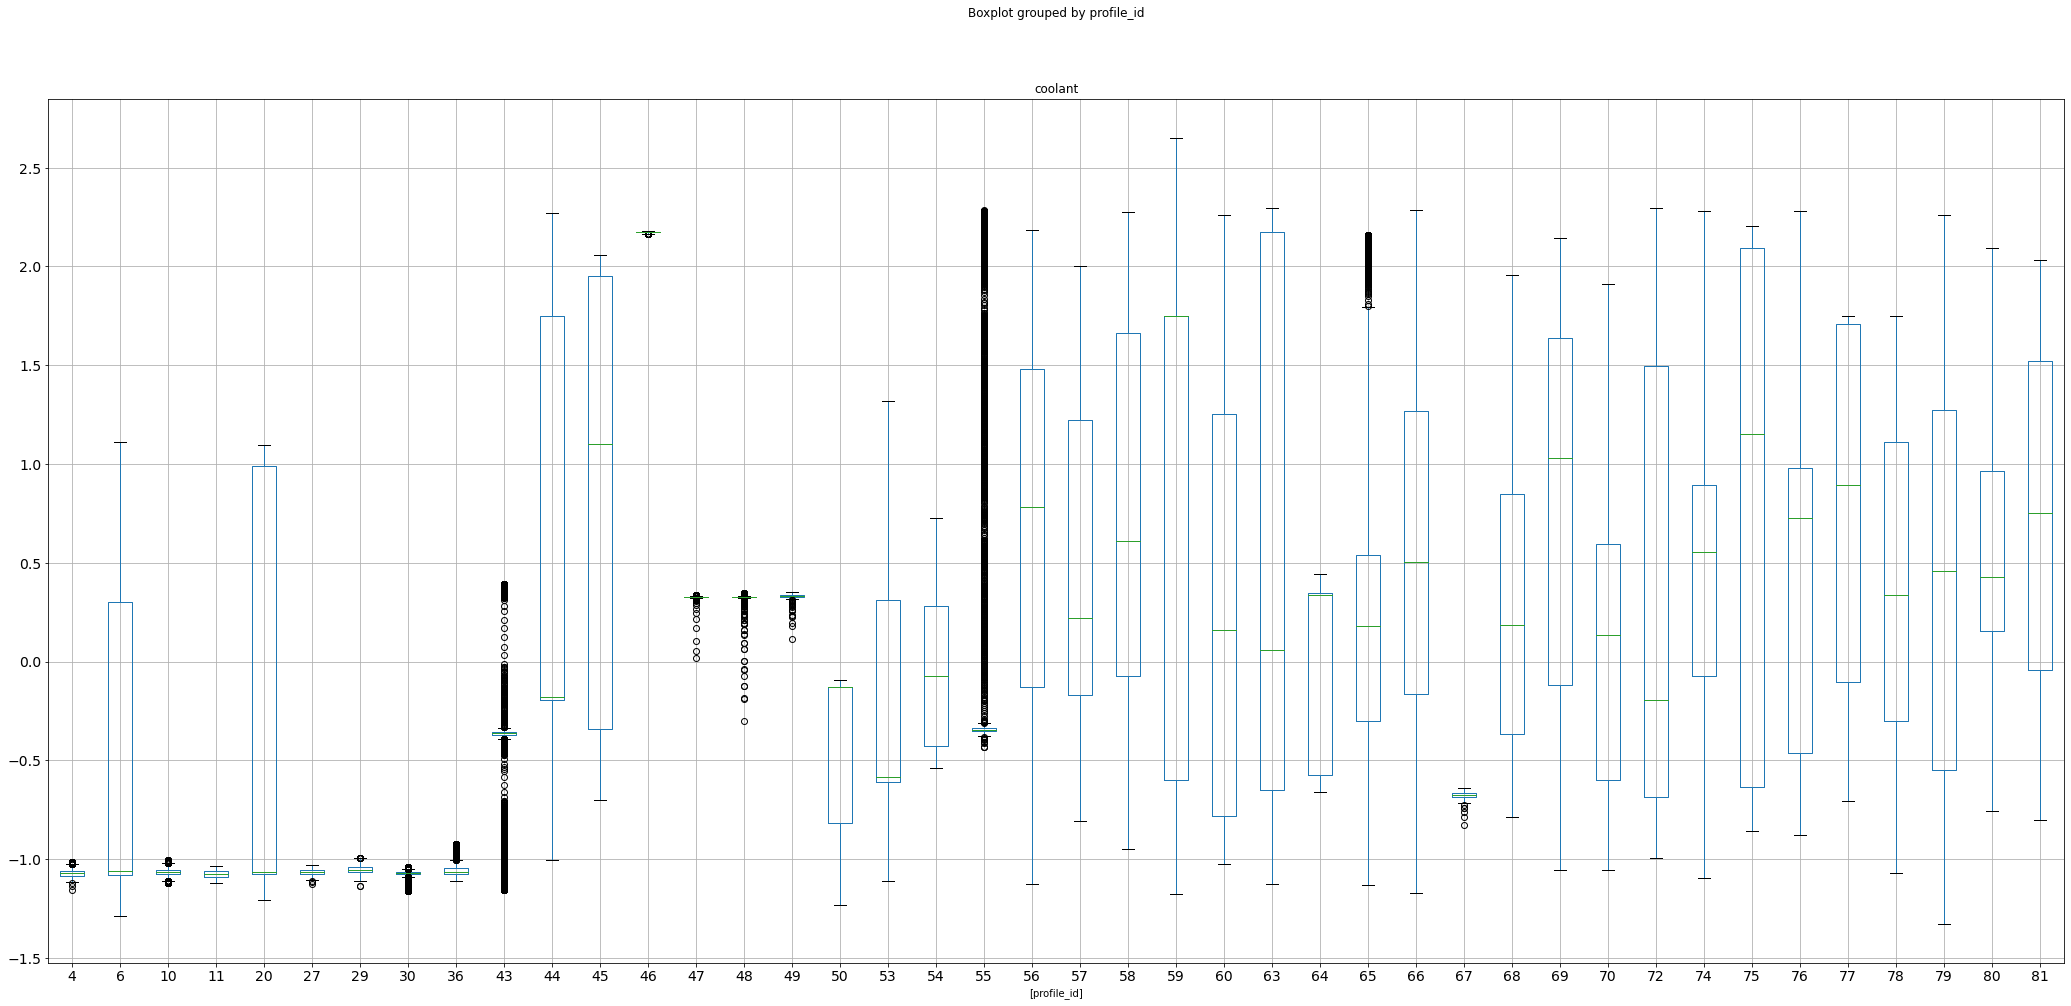

In [15]:
train_df.boxplot(column=['coolant'],by=['profile_id'],fontsize=14,figsize=(35,16))
plt.pyplot.show()

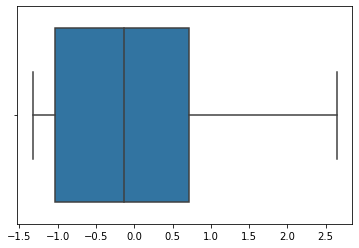

In [16]:
sns.boxplot(train_df[['coolant']])

In [17]:
#remove profile_id from traning dataset
train_df.drop(labels=['profile_id'],axis=1,inplace=True)


### Histogram of all Columns

In [18]:
test_df_temp=pd.concat([test_df,test_true],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f6498350>,
      dtype=object)

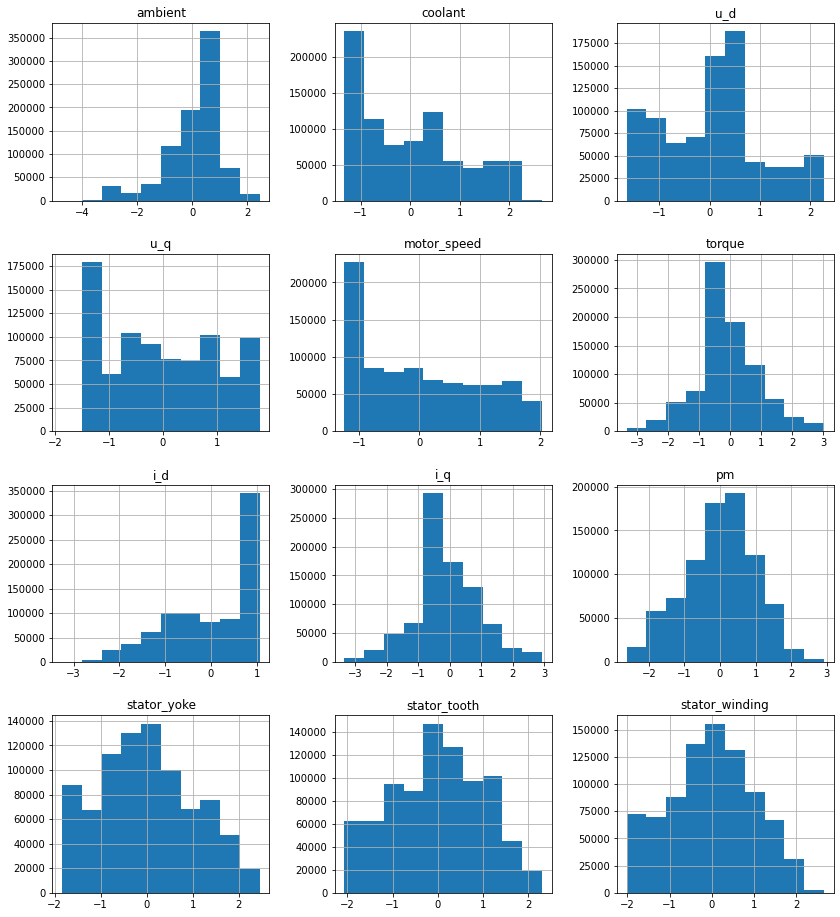

In [19]:
#Distribution plots of train dataset
n= len(train_df.columns)
   
train_df.hist(figsize= (14,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f6264490>,
      dtype=object)

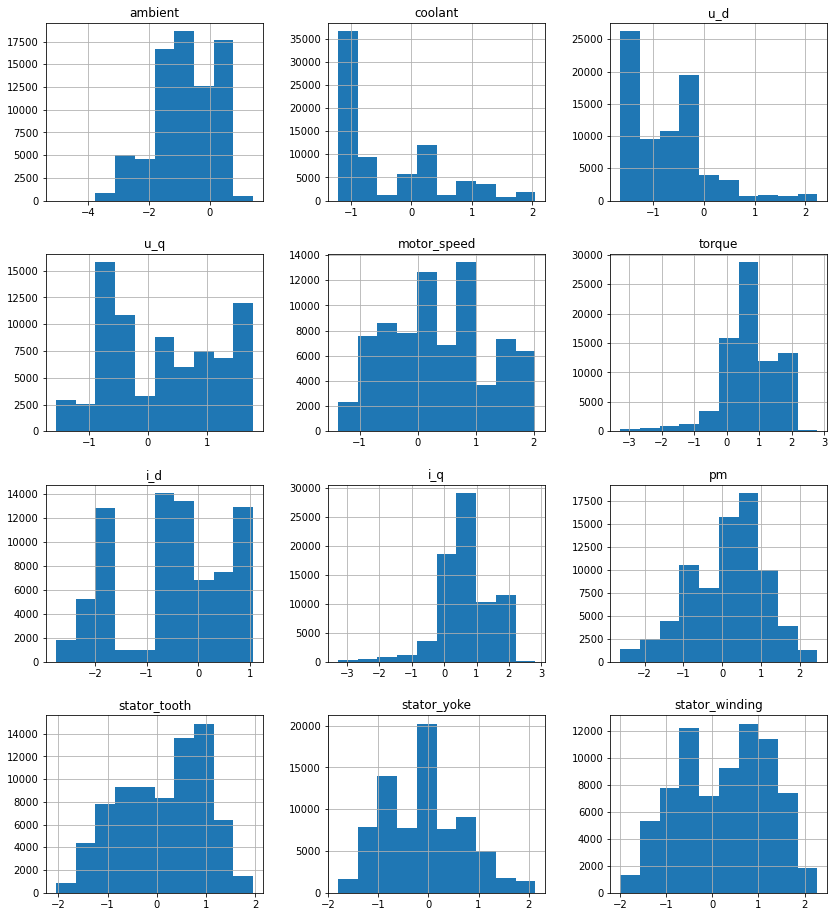

In [20]:
#distribution plot of test dataset
test_df_temp.hist(figsize= (14,16))    

### Check for skewness

In [21]:
numeric_feats = train_df.dtypes[train_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
coolant,0.593155
motor_speed,0.352821
stator_yoke,0.223700
u_q,0.183117
u_d,0.162329
torque,0.022229
i_q,-0.014421
stator_winding,-0.038848
stator_tooth,-0.075103
pm,-0.213798


### Correlation plot

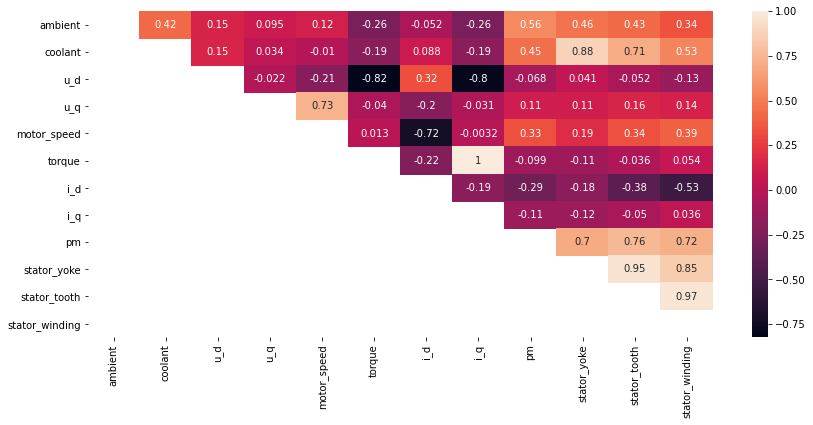

In [22]:
#training dataset
plt.pyplot.figure(figsize=(14,6))
correlation_matrix=np.tril(train_df.corr())
sns.heatmap(train_df.corr(),annot=True,fmt='.2g' ,mask=correlation_matrix)

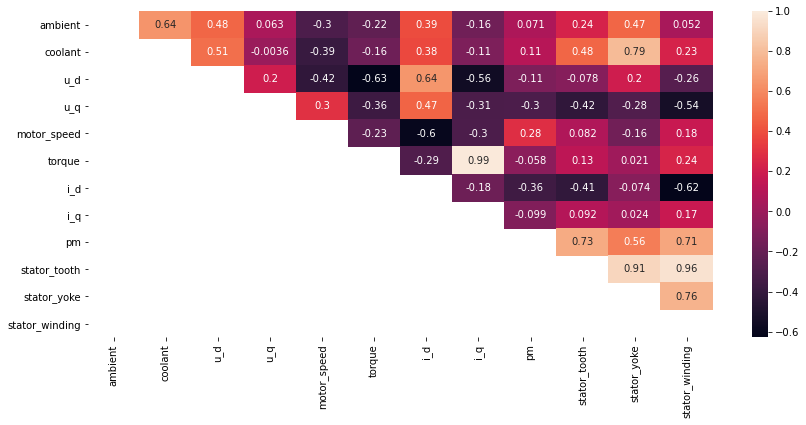

In [23]:
#test dataset
plt.pyplot.figure(figsize=(14,6))
correlation_matrix_test=np.tril(test_df_temp.corr())
sns.heatmap(test_df_temp.corr(),annot=True,fmt='.2g' ,mask=correlation_matrix_test)

## Train/Validation split

In [24]:
test_temp,train_temp=train_test_split(test_df_temp,test_size=0.3,shuffle=True, random_state=1)

In [25]:
test_temp,val_temp=train_test_split(test_temp,test_size=0.4,shuffle=True, random_state=1)

In [26]:
val_temp.shape

(21399, 12)

In [27]:
train_df=pd.concat([train_df,train_temp])

In [28]:
train_df.shape

(868596, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f44b94d0>,
      dtype=object)

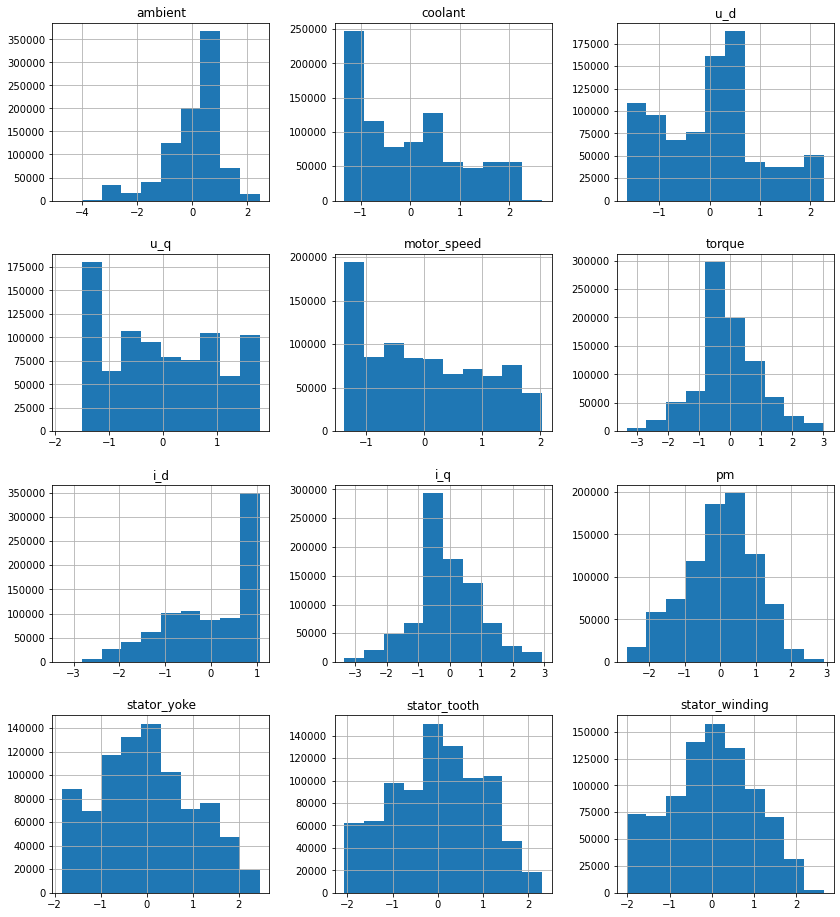

In [29]:
train_df.hist(figsize= (14,16))

In [30]:
## remove torque to Deal With Multicollinearity
train_df.drop(labels=['torque'],axis=1,inplace=True)
val_temp.drop(labels=['torque'],axis=1,inplace=True)
test_df.drop(labels=['torque'],axis=1,inplace=True)



In [31]:
train_df

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...
11195,-1.168872,-1.050427,-1.115377,0.792591,0.941938,-0.769302,0.447383,0.110786,-0.785166,-0.517548,-0.398468
75555,0.688486,1.167703,2.097396,-0.033507,0.394496,-0.934021,-1.695368,1.080125,1.030856,0.910100,0.688163
56196,0.681706,-0.578425,-0.322072,1.594412,0.671393,0.178584,0.082054,-1.275169,-0.885058,-0.978530,-1.080349
35929,-0.814940,-1.049214,-1.599150,-0.586802,0.856992,-1.910549,0.798512,0.328817,-0.224949,0.398125,0.905600


In [32]:
##Split to X,Y variables
X_train=train_df.drop(labels=['pm','stator_yoke','stator_tooth','stator_winding'],axis=1)
y_train = train_df[['pm','stator_yoke','stator_tooth','stator_winding']]
X_val=val_temp.drop(labels=['pm','stator_yoke','stator_tooth','stator_winding'],axis=1)
y_val=val_temp[['pm','stator_yoke','stator_tooth','stator_winding']]


In [33]:
X_train.shape

(868596, 7)

In [34]:
X_val.shape

(21399, 7)

In [35]:
y_train.iloc[:,0]

0       -2.522071
1       -2.522418
2       -2.522673
3       -2.521639
4       -2.521900
           ...   
11195    0.110786
75555    1.080125
56196   -1.275169
35929    0.328817
49349    0.424353
Name: pm, Length: 868596, dtype: float64

## Base XGBoost Model to predict multi dimensional output

In [105]:
# define base xgboost model
XGBmodel_base = xgboost.XGBRegressor(max_depth=4,n_estimators=500,
                                     gamma=0.01, min_child_weight=1,
                                     nthread = 8)


In [ ]:

# define the direct multioutput wrapper model
XGB_wrapper=MultiOutputRegressor(XGBmodel_base)

In [59]:
#fit the basic model
XGB_wrapper.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=0.01,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            nthread=-1, num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                

In [60]:
X_train
#X_val

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,1.029572,-0.245860
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,1.029509,-0.245832
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,1.029448,-0.245818
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,1.032845,-0.246955
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,1.031807,-0.246610
...,...,...,...,...,...,...,...
11195,-1.168872,-1.050427,-1.115377,0.792591,0.941938,-0.769302,0.447383
75555,0.688486,1.167703,2.097396,-0.033507,0.394496,-0.934021,-1.695368
56196,0.681706,-0.578425,-0.322072,1.594412,0.671393,0.178584,0.082054
35929,-0.814940,-1.049214,-1.599150,-0.586802,0.856992,-1.910549,0.798512


In [ ]:
y_hat=XGB_wrapper.predict(X_val)

In [ ]:
#show predicted values
print('Predicted: %s' % y_hat)

Predicted: [[-1.4635562  -0.8034029  -0.4798106   0.20261368]
 [ 0.27807713  0.6015581   0.64293927  0.5722122 ]
 [ 0.30395854 -0.71610606 -0.37702554 -0.30859095]
 ...
 [ 0.05612478 -0.17511225 -0.02456075  0.32265884]
 [ 2.083087    0.14241555  0.98801714  1.4659448 ]
 [ 1.1691017   1.2773498   1.2393343   1.1446764 ]]


In [ ]:
#Root Mean Squared Error
mean_squared_error(y_val, y_hat, squared=False)

0.2550594386097347

In [ ]:
#Mean Squared Error
mean_squared_error(y_val, y_hat, squared=True)

0.0670016929306034

In [66]:
#R^2
r2_score(y_val, y_hat)

0.9194575804802186

In [67]:
test_df

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q
0,-2.749564,-1.073478,0.336463,-1.295874,-1.222426,1.041590,-0.250223
1,-2.749612,-1.072823,0.339015,-1.298281,-1.222425,1.038055,-0.248936
2,-2.746339,-1.073277,0.340775,-1.299160,-1.222428,1.035532,-0.248042
3,-2.747337,-1.074854,0.341972,-1.300307,-1.222428,1.033727,-0.247364
4,-2.748052,-1.076696,0.344047,-1.301804,-1.222429,1.032427,-0.246897
...,...,...,...,...,...,...,...
76418,0.688609,1.633554,0.310133,-1.277628,0.273299,1.060139,-0.257238
76419,0.688609,1.633553,0.310133,-1.277628,0.265776,1.060147,-0.257233
76420,0.688609,1.633745,0.218686,-0.949521,0.258588,1.049340,-0.229511
76421,0.688609,1.633884,-0.281596,-0.791881,0.327896,0.321753,0.110473


In [68]:
#predict test dataset
y_hat_test=XGB_wrapper.predict(test_df)

In [69]:
#Root Mean Squared Error
mean_squared_error(test_true, y_hat_test, squared=False)

0.3737640689460396

In [70]:
#R^2
r2_score(test_true, y_hat_test)

0.8036181790665524

## Modelling for stacked Regression

In [2]:
#import libaries

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



In [72]:
#Validation function
n_folds = 5

def rmse_cv(model,X,y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base Models

In [73]:
#LASSO regression
#since teh model is sensitive to outliers we use RobustScalar() method on pipeline
lasso_model = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [74]:
##Elastic Net Regression
ENet_model=make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [75]:
##Gradient Boosting Regression
#GBoost_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                   max_depth=4, max_features='sqrt',
#                                   min_samples_leaf=15, min_samples_split=10, 
#                                   loss='huber', random_state =5)
#Random Forest Regressor
RForest_model=RandomForestRegressor(n_estimators = 1000, max_depth=4, 
                                    n_jobs=-1, random_state = 5)


In [86]:
##XGBoost
XGBReg_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = 8)

In [77]:
#LightGMB
lgbmr_model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Base Model Scores

In [78]:
score1 = rmse_cv(lasso_model,X_train,y_train.iloc[:,0])
score2 = rmse_cv(lasso_model,X_train,y_train.iloc[:,1])
score3 = rmse_cv(lasso_model,X_train,y_train.iloc[:,2])
score4 = rmse_cv(lasso_model,X_train,y_train.iloc[:,3])
print("\nLasso score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))


Lasso score: 0.7327 (0.0841)


Lasso score: 0.4086 (0.0226)


Lasso score: 0.5742 (0.0411)


Lasso score: 0.6494 (0.0568)



In [79]:
score1 = rmse_cv(ENet_model,X_train,y_train.iloc[:,0])
score2 = rmse_cv(ENet_model,X_train,y_train.iloc[:,1])
score3 = rmse_cv(ENet_model,X_train,y_train.iloc[:,2])
score4 = rmse_cv(ENet_model,X_train,y_train.iloc[:,3])
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))


ElasticNet score: 0.7327 (0.0840)


ElasticNet score: 0.4086 (0.0226)


ElasticNet score: 0.5742 (0.0412)


ElasticNet score: 0.6493 (0.0569)



In [80]:
score1 = rmse_cv(RForest_model,X_train,y_train.iloc[:,0])
score2 = rmse_cv(RForest_model,X_train,y_train.iloc[:,1])
score3 = rmse_cv(RForest_model,X_train,y_train.iloc[:,2])
score4 = rmse_cv(RForest_model,X_train,y_train.iloc[:,3])
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
print("\nRandom Forest score:{:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))



Random Forest score: 0.7953 (0.1115)


Random Forest score: 0.4299 (0.0182)


Random Forest score: 0.5647 (0.0243)


Random Forest score:0.6355 (0.0505)



In [87]:
score1 = rmse_cv(XGBReg_model,X_train,y_train.iloc[:,0])
score2 = rmse_cv(XGBReg_model,X_train,y_train.iloc[:,1])
score3 = rmse_cv(XGBReg_model,X_train,y_train.iloc[:,2])
score4 = rmse_cv(XGBReg_model,X_train,y_train.iloc[:,3])
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))



Xgboost score: 0.7497 (0.1178)


Xgboost score: 0.4199 (0.0420)


Xgboost score: 0.5603 (0.0578)


Xgboost score: 0.6031 (0.0655)



In [88]:
score1 = rmse_cv(lgbmr_model,X_train,y_train.iloc[:,0])
score2 = rmse_cv(lgbmr_model,X_train,y_train.iloc[:,1])
score3 = rmse_cv(lgbmr_model,X_train,y_train.iloc[:,2])
score4 = rmse_cv(lgbmr_model,X_train,y_train.iloc[:,3])
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))



LGBM score: 0.7483 (0.1269)


LGBM score: 0.3986 (0.0298)


LGBM score: 0.5384 (0.0473)


LGBM score: 0.5803 (0.0481)



### Stacking Approach - Averaging Base Models

In [89]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   



In [109]:
averaged_models = AveragingModels(models = (lasso_model,ENet_model,RForest_model))

score1 = rmse_cv(averaged_models,X_train,y_train.iloc[:,0])
score2 = rmse_cv(averaged_models,X_train,y_train.iloc[:,1])
score3 = rmse_cv(averag1ed_models,X_train,y_train.iloc[:,2])
score4 = rmse_cv(averaged_models,X_train,y_train.iloc[:,3])
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

 Averaged base models score: 0.7268 (0.0983)

 Averaged base models score: 0.3983 (0.0145)

 Averaged base models score: 0.5481 (0.0308)

 Averaged base models score: 0.6221 (0.0523)



In [110]:
%%capture output

UsageError: %%capture is a cell magic, but the cell body is empty.


### Stacking - Adding a meta-model
In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

    1)Split the total training set into two disjoint sets (here train and .holdout )

    2)Train several base models on the first part (train)

    3)Test these base models on the second part (holdout)

    4)Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

credit: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [111]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [112]:
y_train.iloc[:,0].values

array([-2.522071  , -2.5224178 , -2.5226731 , ..., -1.2751691 ,
        0.32881716,  0.42435336])

In [113]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet_model, RForest_model,XGBmodel_base),
                                                 meta_model = lasso_model)

score1 = rmse_cv(stacked_averaged_models,X_train,y_train.iloc[:,0].values)
score2 = rmse_cv(stacked_averaged_models,X_train,y_train.iloc[:,1].values)
score3 = rmse_cv(stacked_averaged_models,X_train,y_train.iloc[:,2].values)
score4 = rmse_cv(stacked_averaged_models,X_train,y_train.iloc[:,3].values)
print(" Stacking Averaged models score:  {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
print(" Stacking Averaged models score:  {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print(" Stacking Averaged models score:  {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
print(" Stacking Averaged models score:  {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

 Stacking Averaged models score:  0.7593 (0.0793)

 Stacking Averaged models score:  0.4572 (0.0451)

 Stacking Averaged models score:  0.6163 (0.0524)

 Stacking Averaged models score:  0.6635 (0.0601)



### Ensembling StackedRegressor, XGBoost and LightGBM

In [114]:
#Evaluation function
def get_rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#### Stacked Output Regressor

In [117]:
#Stacked Regressor for predicting pm temperature
stacked_averaged_models_pm = StackingAveragedModels(base_models = (ENet_model, RForest_model,XGBmodel_base),
                                                 meta_model = lasso_model)
stacked_averaged_models_pm.fit(X_train.values, y_train.iloc[:,0].values)


StackingAveragedModels(base_models=(Pipeline(steps=[('robustscaler',
                                                     RobustScaler()),
                                                    ('elasticnet',
                                                     ElasticNet(alpha=0.0005,
                                                                l1_ratio=0.9,
                                                                random_state=3))]),
                                    RandomForestRegressor(max_depth=4,
                                                          n_estimators=1000,
                                                          n_jobs=-1,
                                                          random_state=5),
                                    XGBRegressor(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                     

In [119]:
stacked_train_pred_pm = stacked_averaged_models_pm.predict(X_train.values)
stacked_val_pred_pm = stacked_averaged_models_pm.predict(X_val.values)
#stacked_pred_pm = np.expm1(stacked_averaged_models_pm.predict(test_df))
stacked_pred_pm = stacked_averaged_models_pm.predict(test_df.values)
print("Train score:  {:.4f} \n".format(get_rmse(y_train.iloc[:,0].values, stacked_train_pred_pm)))
print("Validation score:  {:.4f} \n".format(get_rmse(y_val.iloc[:,0].values, stacked_val_pred_pm)))

Train score:  0.2665 

Validation score:  0.2781 



In [120]:
#Stacked Regressor for predicting Stator Yoke temperature
stacked_averaged_models_sy = StackingAveragedModels(base_models = (ENet_model, RForest_model,XGBmodel_base),
                                                 meta_model = lasso_model)
stacked_averaged_models_sy.fit(X_train.values, y_train.iloc[:,1].values)
stacked_train_pred_sy = stacked_averaged_models_sy.predict(X_train.values)
stacked_val_pred_sy = stacked_averaged_models_sy.predict(X_val.values)
stacked_pred_sy = stacked_averaged_models_sy.predict(test_df.values)
print("Train score:  {:.4f} \n".format(get_rmse(y_train.iloc[:,1].values, stacked_train_pred_sy)))
print("Validation score:  {:.4f} \n".format(get_rmse(y_val.iloc[:,1].values, stacked_val_pred_sy)))

Train score:  0.1923 

Validation score:  0.1728 



In [121]:
#Stacked Regressor for predicting Stator tooth temperature
stacked_averaged_models_st = StackingAveragedModels(base_models = (ENet_model, RForest_model,XGBmodel_base),
                                                 meta_model = lasso_model)
stacked_averaged_models_st.fit(X_train.values, y_train.iloc[:,2].values)
stacked_train_pred_st = stacked_averaged_models_st.predict(X_train.values)
stacked_val_pred_st = stacked_averaged_models_st.predict(X_val.values)
stacked_pred_st = stacked_averaged_models_st.predict(test_df.values)
print("Train score:  {:.4f} \n".format(get_rmse(y_train.iloc[:,2].values, stacked_train_pred_st)))
print("Validation score:  {:.4f} \n".format(get_rmse(y_val.iloc[:,2].values, stacked_val_pred_st)))

Train score:  0.2586 

Validation score:  0.2383 



In [122]:
#Stacked Regressor for predicting Stator winding temperature
stacked_averaged_models_sw = StackingAveragedModels(base_models = (ENet_model, RForest_model,XGBmodel_base),
                                                 meta_model = lasso_model)
stacked_averaged_models_sw.fit(X_train.values, y_train.iloc[:,3].values)
stacked_train_pred_sw = stacked_averaged_models_sw.predict(X_train.values)
stacked_val_pred_sw = stacked_averaged_models_sw.predict(X_val.values)
stacked_pred_sw = stacked_averaged_models_sw.predict(test_df.values)
print("Train score:  {:.4f} \n".format(get_rmse(y_train.iloc[:,3].values, stacked_train_pred_sw)))
print("Validation score:  {:.4f} \n".format(get_rmse(y_val.iloc[:,3].values, stacked_val_pred_sw)))

Train score:  0.2904 

Validation score:  0.2683 



#### XGBoost

In [123]:
#XGBoost for predicting pm temperature

XGBReg_model_pm = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = 8)

XGBReg_model_pm.fit(X_train, y_train.iloc[:,0].values)
xgb_train_pred_pm = XGBReg_model_pm.predict(X_train)
xgb_val_pred_pm = XGBReg_model_pm.predict(X_val)
xgb_pred_pm = XGBReg_model_pm.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,0].values, xgb_train_pred_pm)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,0].values, xgb_val_pred_pm)))

Train score: :  0.4472 

Validation score: :  0.6052 



In [124]:
#XGBoost for predicting Stator yoke temperature

XGBReg_model_sy = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = 8)

XGBReg_model_sy.fit(X_train, y_train.iloc[:,1].values)
xgb_train_pred_sy = XGBReg_model_sy.predict(X_train)
xgb_val_pred_sy = XGBReg_model_sy.predict(X_val)
xgb_pred_sy = XGBReg_model_sy.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,1].values, xgb_train_pred_sy)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,1].values, xgb_val_pred_sy)))

Train score: :  0.2872 

Validation score: :  0.3018 



In [125]:
#XGBoost for predicting Stator tooth temperature

XGBReg_model_st = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = 8)

XGBReg_model_st.fit(X_train, y_train.iloc[:,2].values)
xgb_train_pred_st = XGBReg_model_st.predict(X_train)
xgb_val_pred_st = XGBReg_model_st.predict(X_val)
xgb_pred_st = XGBReg_model_st.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,2].values, xgb_train_pred_st)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,2].values, xgb_val_pred_st)))

Train score: :  0.3891 

Validation score: :  0.4153 



In [126]:
#XGBoost for predicting Stator Winding temperature

XGBReg_model_sw = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = 8)

XGBReg_model_sw.fit(X_train, y_train.iloc[:,3].values)
xgb_train_pred_sw = XGBReg_model_sw.predict(X_train)
xgb_val_pred_sw = XGBReg_model_sw.predict(X_val)
xgb_pred_sw = XGBReg_model_sw.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,3].values, xgb_train_pred_sw)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,3].values, xgb_val_pred_sw)))

Train score: :  0.4317 

Validation score: :  0.4534 



#### LightGBM

In [127]:
#LightGBM for predicting pm temperature

lgbmr_model_pm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgbmr_model_pm.fit(X_train, y_train.iloc[:,0].values)
lgb_train_pred_pm = lgbmr_model_pm.predict(X_train)
lgb_val_pred_pm = lgbmr_model_pm.predict(X_val)
lgb_pred_pm = lgbmr_model_pm.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,0].values, lgb_train_pred_pm)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,0].values, lgb_val_pred_pm)))

Train score: :  0.5431 

Validation score: :  0.7670 



In [128]:
#LightGBM for predicting Stator Yoke temperature

lgbmr_model_sy = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgbmr_model_sy.fit(X_train, y_train.iloc[:,1].values)
lgb_train_pred_sy = lgbmr_model_sy.predict(X_train)
lgb_val_pred_sy = lgbmr_model_sy.predict(X_val)
lgb_pred_sy = lgbmr_model_sy.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,1].values, lgb_train_pred_sy)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,1].values, lgb_val_pred_sy)))

Train score: :  0.3266 

Validation score: :  0.3322 



In [129]:
#LightGBM for predicting Stator Tooth temperature

lgbmr_model_st = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgbmr_model_st.fit(X_train, y_train.iloc[:,2].values)
lgb_train_pred_st = lgbmr_model_st.predict(X_train)
lgb_val_pred_st = lgbmr_model_st.predict(X_val)
lgb_pred_st = lgbmr_model_st.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,2].values, lgb_train_pred_st)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,2].values, lgb_val_pred_st)))

Train score: :  0.4427 

Validation score: :  0.4605 



In [130]:
#LightGBM for predicting Stator winding temperature

lgbmr_model_sw = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgbmr_model_sw.fit(X_train, y_train.iloc[:,0].values)
lgb_train_pred_sw = lgbmr_model_sw.predict(X_train)
lgb_val_pred_sw = lgbmr_model_sw.predict(X_val)
lgb_pred_sw = lgbmr_model_sw.predict(test_df)
print("Train score: :  {:.4f} \n".format(get_rmse(y_train.iloc[:,0].values, lgb_train_pred_sw)))
print("Validation score: :  {:.4f} \n".format(get_rmse(y_val.iloc[:,0].values, lgb_val_pred_sw)))

Train score: :  0.5431 

Validation score: :  0.7670 



### RMSE on the entire Train data when averaging

In [131]:
'''RMSE on the entire Train data when averaging'''

print('RMSE score on train data - pm: \n')
print(get_rmse(y_train.iloc[:,0].values,stacked_train_pred_pm*0.70 +
               xgb_train_pred_pm*0.15 + lgb_train_pred_pm*0.15 ))

print('RMSE score on train data - sy: \n')
print(get_rmse(y_train.iloc[:,1].values,stacked_train_pred_sy*0.70 +
               xgb_train_pred_sy*0.15 + lgb_train_pred_sy*0.15 ))

print('RMSE score on train data - st: \n')
print(get_rmse(y_train.iloc[:,2].values,stacked_train_pred_st*0.70 +
               xgb_train_pred_st*0.15 + lgb_train_pred_st*0.15 ))

print('RMSE score on train data - sw: \n')
print(get_rmse(y_train.iloc[:,3].values,stacked_train_pred_sw*0.70 +
               xgb_train_pred_sw*0.15 + lgb_train_pred_sw*0.15 ))

RMSE score on train data - pm: 

0.3036041074758331
RMSE score on train data - sy: 

0.21086189060569926
RMSE score on train data - st: 

0.28382494193461055
RMSE score on train data - sw: 

0.3279068676310127


### Ensemble Prediction

In [132]:
#Ensemble Prediction
ensemble_pm = stacked_pred_pm*0.70 + xgb_pred_pm*0.15 + lgb_pred_pm*0.15
ensemble_sy = stacked_pred_sy*0.70 + xgb_pred_sy*0.15 + lgb_pred_sy*0.15
ensemble_st = stacked_pred_st*0.70 + xgb_pred_st*0.15 + lgb_pred_st*0.15
ensemble_sw = stacked_pred_sw*0.70 + xgb_pred_sw*0.15 + lgb_pred_sw*0.15


In [133]:
#RMSE
RMSE_pm=get_rmse(test_true.iloc[:,0].values, ensemble_pm)
RMSE_stator_yoke=get_rmse(test_true.iloc[:,1].values, ensemble_sy)
RMSE_stator_tooth=get_rmse(test_true.iloc[:,2].values, ensemble_st)
RMSE_stator_winding=get_rmse(test_true.iloc[:,3].values, ensemble_sw)


### Submission

In [134]:
#Prediction
sub = pd.DataFrame()
sub['pm_predicted'] = ensemble_pm
sub['stator_yoke_predicted'] = ensemble_sy
sub['stator_tooth_predicted'] = ensemble_st
sub['stator_winding_predicted'] = ensemble_sw
sub.to_csv('submission.csv',index=False)

In [135]:
final_rmse = pd.DataFrame()
final_rmse['RMSE_pm'] = RMSE_pm
final_rmse['RMSE_stator_yoke'] = RMSE_stator_yoke
final_rmse['RMSE_stator_tooth'] = RMSE_stator_tooth
final_rmse['RMSE_stator_winding'] = RMSE_stator_winding
final_rmse.to_csv('rmse_submission.csv',index=False)

In [136]:
print("RMSE_pm: ",RMSE_pm)
print("RMSE_stator_yoke: ",RMSE_stator_yoke)
print("RMSE_stator_tooth: ",RMSE_stator_tooth)
print("RMSE_stator_winding: ",RMSE_stator_winding)

RMSE_pm:  0.35153019984326317
RMSE_stator_yoke:  0.5084295604137152
RMSE_stator_tooth:  0.4118579533174224
RMSE_stator_winding:  0.3200446434628302
